# t-SNE (t-distributed Stochastic Neighbor Embedding) dimensionality reduction sample

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import time


digits = load_digits()

In [2]:
print(digits.data.shape)
print(digits.data)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


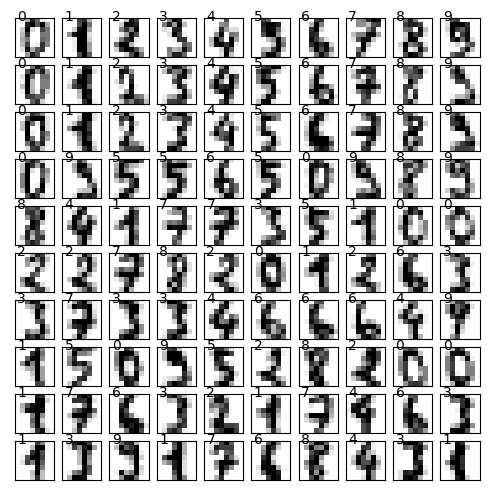

In [3]:
fig, axes = plt.subplots(
    10,
    10,
    figsize=(6, 6),
    subplot_kw={
        'xticks': [],
        'yticks': []
    }
)

for i, ax in enumerate(axes.flat):
    ax.imshow(
        digits.images[i],
        cmap='binary',
        interpolation='nearest'
    )
    ax.text(
        0,
        0,
        str(digits.target[i])
    )

In [4]:
def plot_classification_result(x_fitted, x_target, labels, plotter) -> None:
    """Plot data classification result.
    """
    for l in labels:
        is_same_digit: bool = x_target == l
        plotter.scatter(
            x_fitted[is_same_digit, 0],
            x_fitted[is_same_digit, 1],
            label=f'{l}'
        )
        plotter.legend()

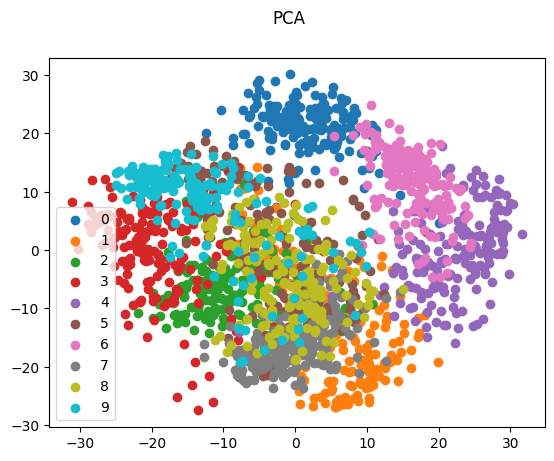

In [5]:
# Visualization using PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)

plot_classification_result(
    X,
    digits.target,
    digits.target_names,
    plt
)
plt.suptitle('PCA')
plt.show()

- It is not classified by number well.
  - PCA is not able to handle non-linear data.

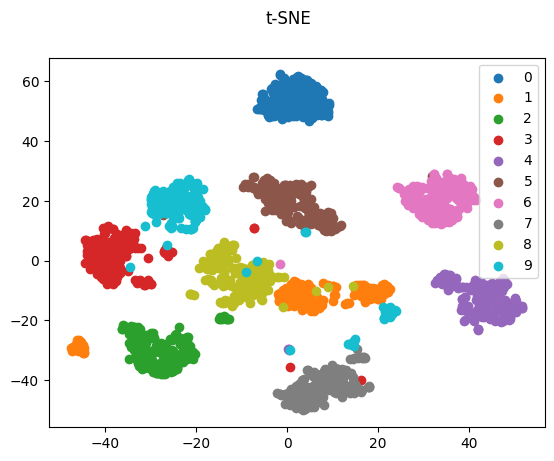

In [6]:
# Visualization using t-SNE
tsne = TSNE(
    n_components=2,
    random_state=0
)
X_tsne = tsne.fit_transform(digits.data)

plot_classification_result(
    X_tsne,
    digits.target,
    digits.target_names,
    plt
)
plt.suptitle('t-SNE')
plt.show()

In [7]:
# Search for optimal perplexity.
PERPLEXITY_CANDIDATES = [2, 5, 30, 50, 100]


def tsne_two_dimentions(
    target_x,
    y,
    y_label,
    perplexity_candidates: list[int]
) -> None:
    perplexity_candidates_len = len(perplexity_candidates)
    
    fg, ax = plt.subplots(
        nrows=1,
        ncols=perplexity_candidates_len,
        figsize=(
            5 * perplexity_candidates_len,
            4
        )
    )
    
    perplexity_candidates_and_axes = zip(
        ax.flatten(),
        perplexity_candidates
    )
    
    for _, (a, p) in enumerate(perplexity_candidates_and_axes):
        start = time.time()
        
        tsne = TSNE(
            n_components=2,
            random_state=0,
            perplexity=p
        )
        Y = tsne.fit_transform(target_x)
        
        plot_classification_result(
            Y,
            y,
            y_label,
            a
        )
        
        duration = time.time() - start
        a.legend()
        a.set_title(f'Perplexity {p}')
        
        print(f'Perplexity {p} is {duration:.2f} seconds.')

    plt.show()

Perplexity 2 is 11.60 seconds.
Perplexity 5 is 5.21 seconds.
Perplexity 30 is 5.87 seconds.
Perplexity 50 is 9.30 seconds.
Perplexity 100 is 11.29 seconds.


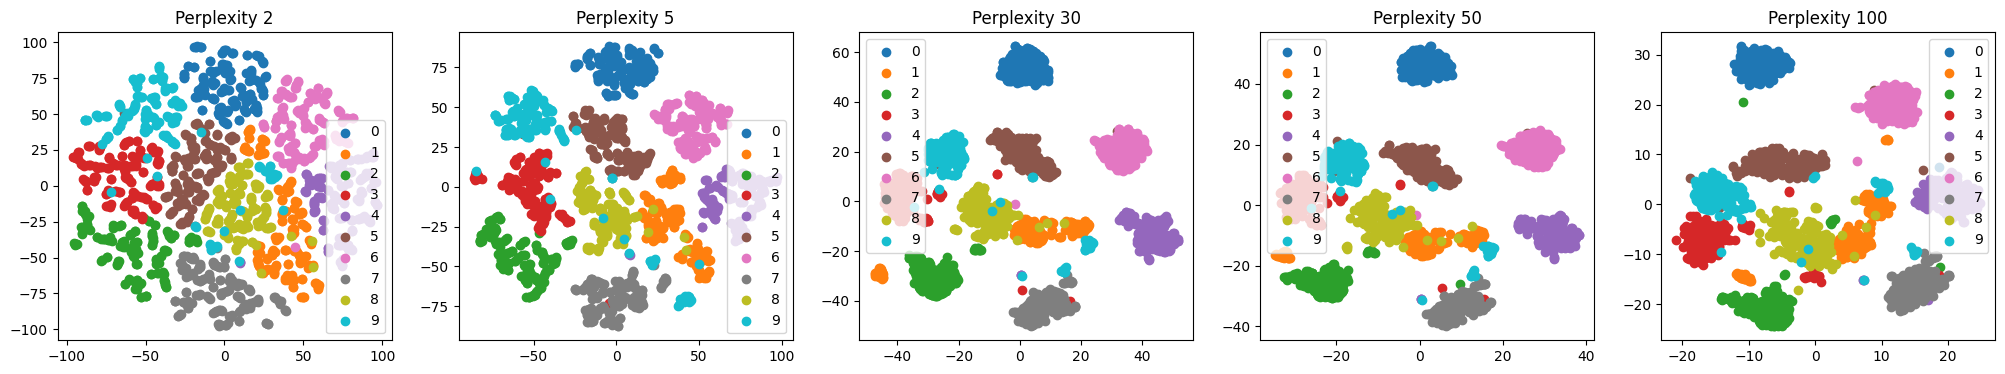

In [8]:
tsne_two_dimentions(
    digits.data,
    digits.target,
    digits.target_names,
    PERPLEXITY_CANDIDATES
)